In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For my dataset, I chose Allegheny County Fast Food Establishments. This dataset tracks the location of fast food restaurants across Allegheny County. I will be using this dataset to tally the number of fast food restaurants in each Pittsburgh neighborhood. In this situation, the neighborhood with the fewest fast food restaurants is the healthiest.

In [2]:
Food = pd.read_csv("fastfoodalleghenycountyupdatexy2.csv")

Here I import the dataset, then display some values so you can get a sense of what the dataset keeps track of.

In [3]:
Food.head(10)

,Name,Legal Name,Start Date,Street Number,Street Name,ZIP Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/2014,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/2004,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/1997,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/2001,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/1999,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out
5,Angelia's Pizza,JNG Pizza LLC,5/11/2004,202,Moon Clinton Rd,15108,40.513135,-80.223406,Take Out
6,Angelia's Pizza / Chill Frozen Dessserts,Eaton Pizza Inc,10/7/2005,410,Penn Lincoln Dr,15126,40.442466,-80.235992,Take Out
7,Antney's Ice Cream,The Iceman Inc,4/11/2002,1316,Poplar St,15205,40.427470,-80.052435,"Breakfast, Drink, Other"
8,Arby's,Kinco Inc,1/1/1975,1617,Freeport Rd,15065,40.622125,-79.727516,Dollar Menu
9,Arby's #8,Linell Corporation,12/3/2007,3974,Wm Penn Hwy,15146,40.437988,-79.772845,Dollar Menu


Here, this for loop iterates through the dataset, and counts how many times each zip code shows up. The number of times a zip code shows up is the number of fast food restaurants in the zip code.

In [4]:
AQI = {}
n=0
n1=0
n2=1
for row in Food.iterrows():
    n1 = Food.iloc[n,5] 
    if n1 not in AQI:
        AQI[n1] = n2
    elif n1 in AQI:
        AQI[n1] = AQI[n1] + n2
    n = n+1

AQI

{15237: 44,
 15219: 27,
 15210: 11,
 15108: 19,
 15126: 1,
 15205: 36,
 15065: 10,
 15146: 51,
 15216: 11,
 15213: 38,
 15017: 19,
 15136: 12,
 15044: 14,
 16046: 3,
 15234: 11,
 15218: 7,
 15147: 7,
 15122: 16,
 15202: 13,
 15239: 9,
 15236: 25,
 15102: 21,
 15131: 9,
 15222: 46,
 15123: 3,
 15231: 11,
 15084: 15,
 15232: 12,
 15241: 15,
 15090: 18,
 15203: 19,
 15238: 18,
 15106: 10,
 15120: 16,
 15137: 13,
 15025: 2,
 15224: 6,
 15220: 15,
 15275: 10,
 15143: 10,
 15217: 20,
 15101: 10,
 15223: 5,
 15071: 3,
 15227: 12,
 15206: 11,
 15282: 1,
 15212: 9,
 15201: 5,
 15221: 12,
 15034: 4,
 15229: 8,
 15235: 22,
 15132: 9,
 15228: 7,
 15211: 2,
 15116: 3,
 15076: 1,
 15145: 2,
 15226: 7,
 15037: 3,
 15140: 1,
 15139: 3,
 15209: 3,
 15208: 1,
 15207: 1,
 15129: 1,
 15215: 4,
 15144: 1,
 15024: 2,
 15110: 2,
 15233: 4,
 15148: 1,
 15003: 1,
 15225: 1,
 15045: 1,
 15056: 2}

Here I had to manually turn zip codes into neighborhoods. I did this because the first dataset we used was divided into neighborhoods, so I conformed this dataset to fit into that model for better comparisons of neighborhoods. Also, this dataset covered all of Allegheny County, while we were focusing on neighborhoods of Pittsburgh.

In [5]:
Lawrenceville = np.array([15201])
FlagPlaza = np.array([15219])
Avalon = np.array([15202])
Lincoln = np.array([15207])
SouthFayette = np.array([15017, 15071, 15031, 15057, 15082, 15142, 15064, 15231])
NorthBraddock = np.array([15104])
ParkwayEast = np.array([15112])
GlassportHighStreet = np.array([15045])
Clairton = np.array([15025])
WestMifflin = np.array([15034, 15236, 15122, 15123, 15207])
# ^The ZIP Codes of each neighborhood

These are some arrays, a dictionary and a list to make processing the data easier.

In [6]:
AllLocations = np.array([Lawrenceville, FlagPlaza, Avalon, Lincoln, SouthFayette, NorthBraddock, ParkwayEast, GlassportHighStreet, Clairton, WestMifflin])
# ^array of above arrays
AllLocationsNames = np.array(["Lawrenceville", "Flag Plaza", "Avalon", "Lincoln", "South Fayette", "North Braddock", "Parkway East", "Glassport High Street", "Clairton", "West Mifflin"])
# ^name of each array
TotalLocations = {}
#empty dictionary to display data
zipCodeList = list(AQI.keys())
#all the zip codes in the dataset moved into a list

/tmp/ipykernel_4431/1811638461.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  AllLocations = np.array([Lawrenceville, FlagPlaza, Avalon, Lincoln, SouthFayette, NorthBraddock, ParkwayEast, GlassportHighStreet, Clairton, WestMifflin])


This is a nested loop. The inner loop checks if each zipcode is part of a neighborhood. If a zipcode is part of a neighborhood it adds the number of fast food restaurants in the zip code to the neighborhood total. The outer loop just moves to the next neighborhood so the process can be repeated.

In [7]:
for i in range(len(AllLocations)):
    for j in range(len(zipCodeList)):
        if zipCodeList[j] in AllLocations[i]:
            if AllLocationsNames[i] not in TotalLocations.keys():
                TotalLocations[AllLocationsNames[i]] = AQI[zipCodeList[j]]
                #if the neighborhood isnt in the dictionary add it
            else:
                TotalLocations[AllLocationsNames[i]] += AQI[zipCodeList[j]]
                #if the neighborhood is in the dictionary add to its value

for i in range(len(AllLocationsNames)):
    if AllLocationsNames[i] not in TotalLocations.keys():
        TotalLocations[AllLocationsNames[i]] = 0
#if adds a neighborhood to the dictionary if it has no locations

dict(sorted(TotalLocations.items(), key=lambda item: item[1]))
#sorts data

{'North Braddock': 0,
 'Parkway East': 0,
 'Lincoln': 1,
 'Glassport High Street': 1,
 'Clairton': 2,
 'Lawrenceville': 5,
 'Avalon': 13,
 'Flag Plaza': 27,
 'South Fayette': 33,
 'West Mifflin': 49}

Here we have a sorted list of each neighborhood and how many fast food restaurants they have. The higher vertically on the list, with a lower integer value is a healthier neighborhood, while lower vertically, with a higher integer value is a less healthy neighborhood. By this metric North Braddock and Parkway East are tied for healthiest neighborhoods, while West Mifflin stands alone as least healthy.

Here is the same data from the dictionary displayed in the form of a bar graph.

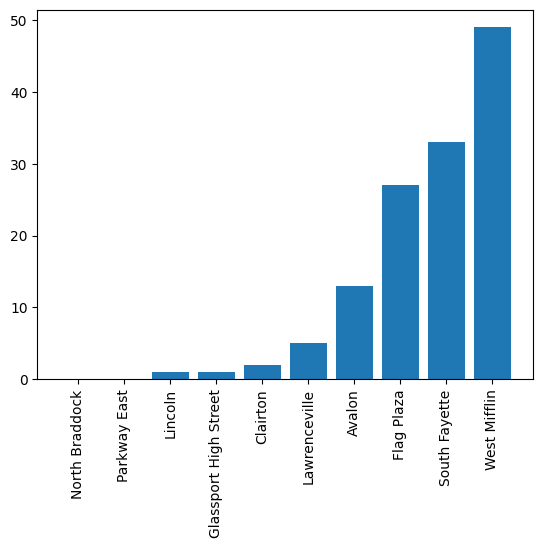

In [8]:
TotalLocationsSorted = dict(sorted(TotalLocations.items(), key=lambda item: item[1]))
names = list(TotalLocationsSorted.keys())
values = list(TotalLocationsSorted.values())
plt.bar(range(len(TotalLocationsSorted)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()